### 1. Get the numerical variables from our dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset
data = pd.read_csv('.\\files_for_lab\\we_fn_use_c_marketing_customer_value_analysis.csv')

numeric_data = data._get_numeric_data()
numeric_data.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

In [38]:
def dist_plotter(df):
    for col in df:
        sns.distplot(df[col])
        plt.show()

In [39]:
numeric_data

Customer Lifetime Value  Income  Monthly Premium Auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies  Total Claim Amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


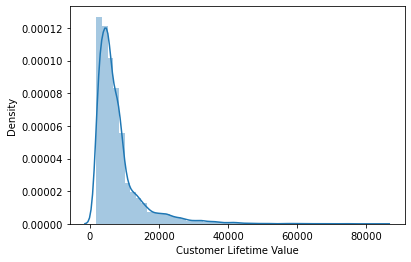

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


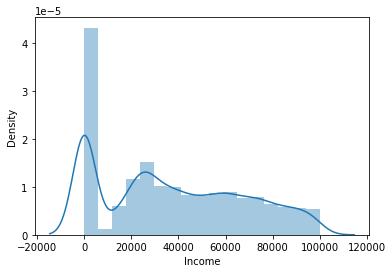

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


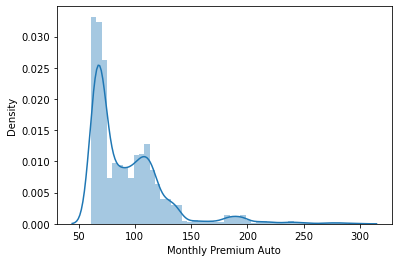

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


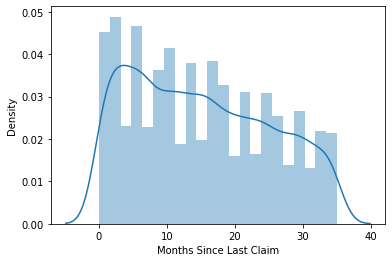

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


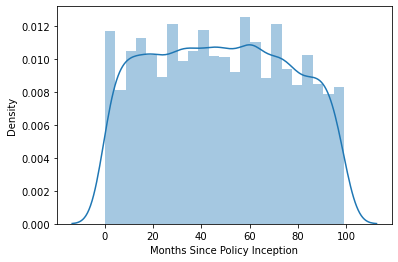

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


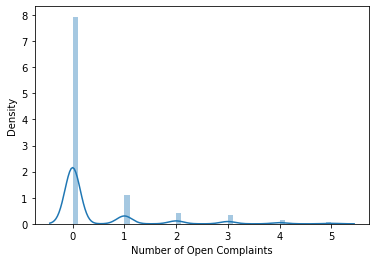

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


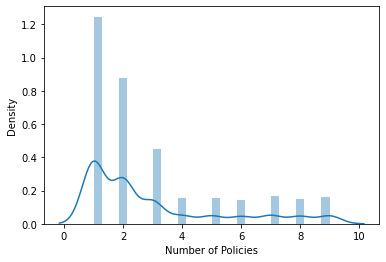

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


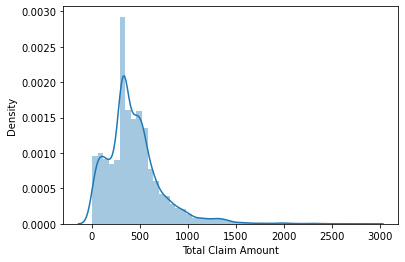

In [40]:
dist_plotter(numeric_data)

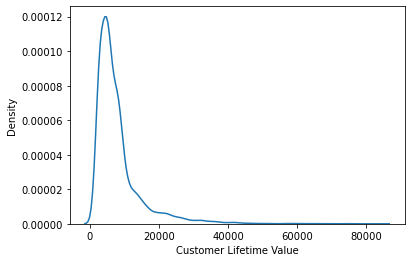

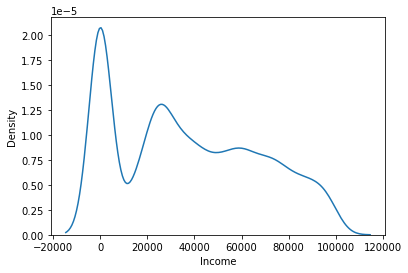

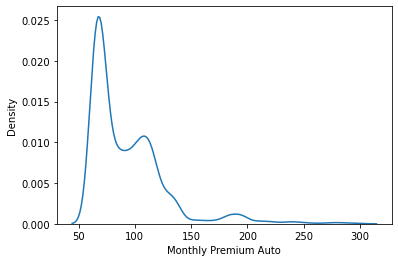

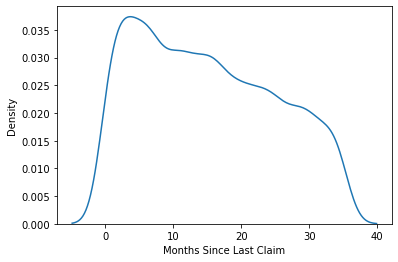

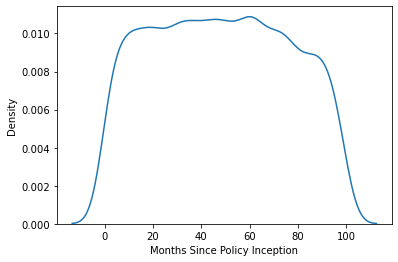

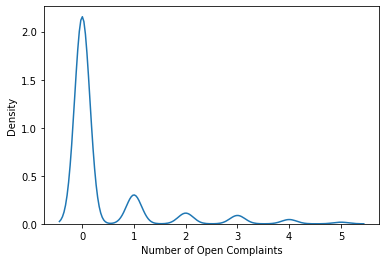

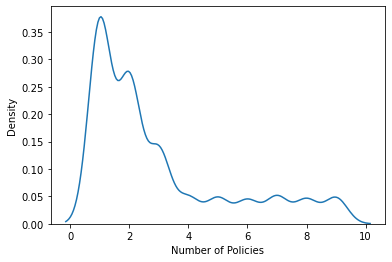

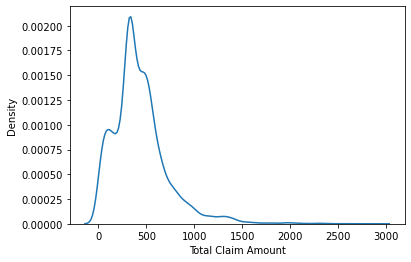

In [41]:
def con_plotter(df):
    for col in df:
        sns.kdeplot(df[col])
        plt.show()
con_plotter(numeric_data)        

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

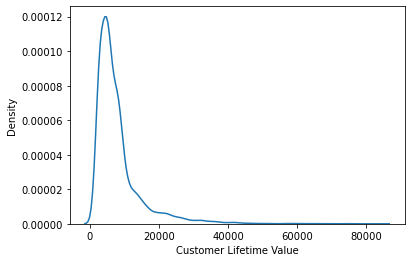

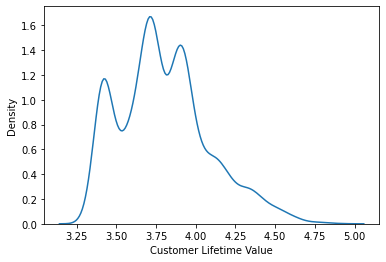

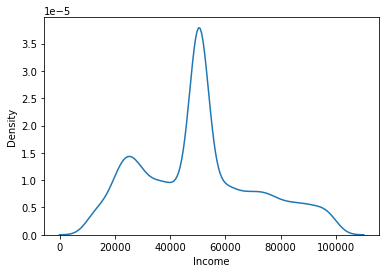

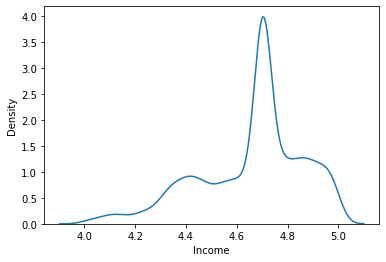

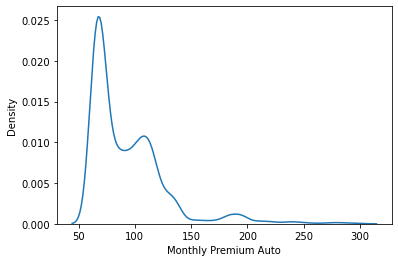

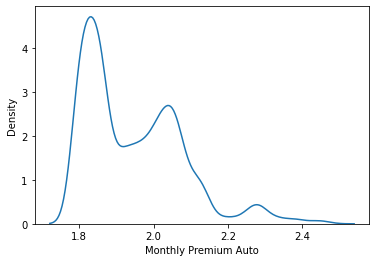

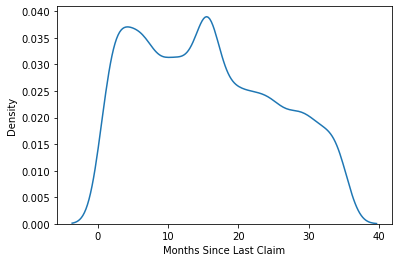

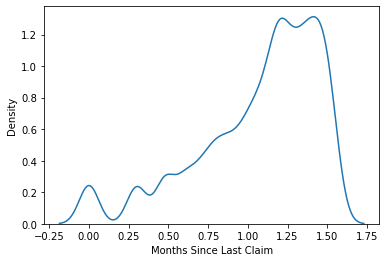

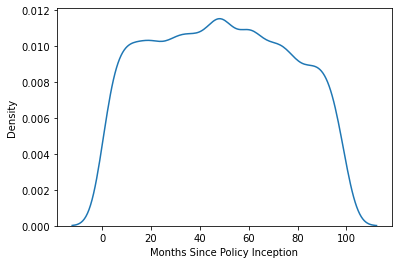

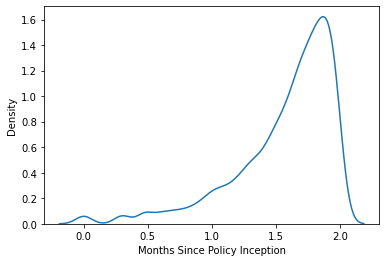

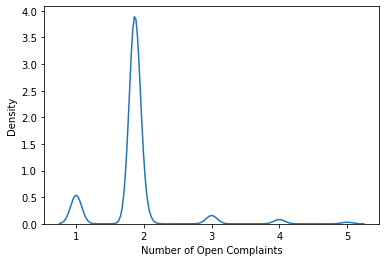

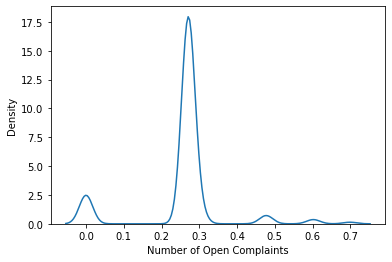

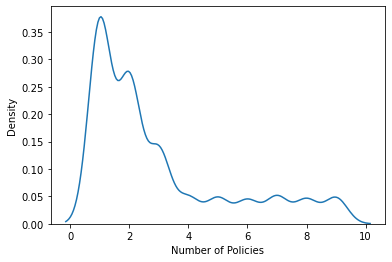

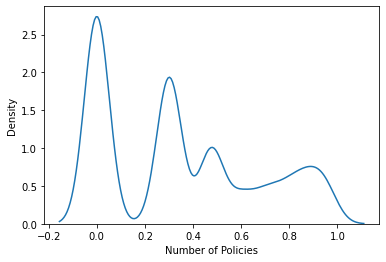

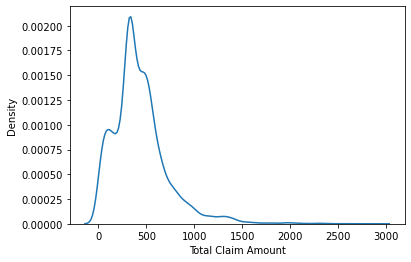

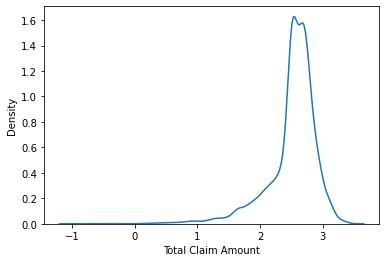

In [45]:
# log transformation
def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
numericals_log = numeric_data.copy()

for col in numericals_log:
    numericals_log[col] = numericals_log[col].apply(lambda x :log_transfom_clean(x))

for column in numeric_data.columns:
    sns.kdeplot(numeric_data[column])
    plt.show()
    sns.kdeplot(numericals_log[column])
    plt.show()

0


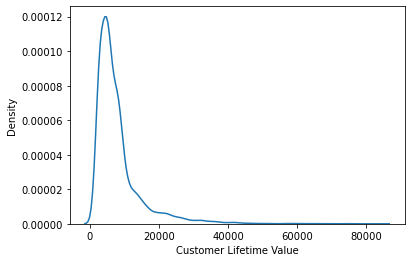

2317


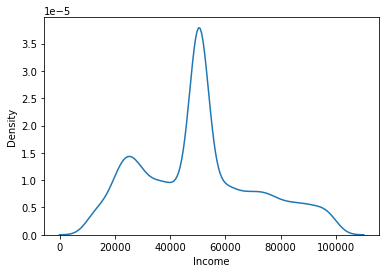

0


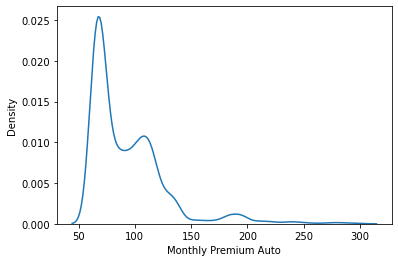

314


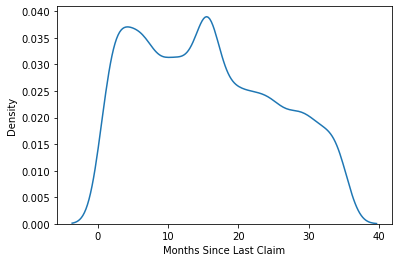

83


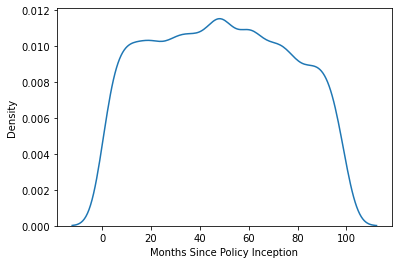

7252


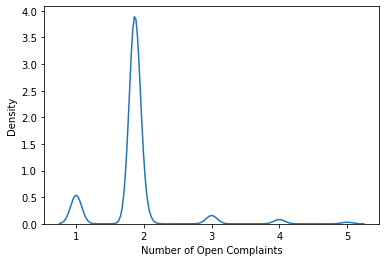

0


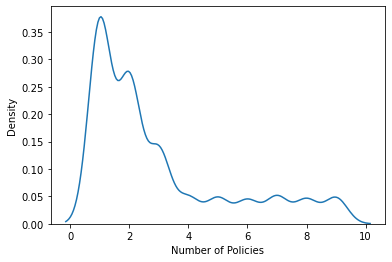

0


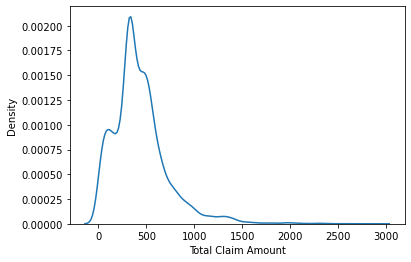

In [43]:
# BoxCox transformation

list = numeric_data.columns

for col in list:
    
    print(len(numeric_data[numeric_data[col]<=0]))

    mean = np.sum(numeric_data[col])/len(numeric_data[numeric_data[col]>0])

    numeric_data[col] = numeric_data[col].replace(0,mean)
    sns.kdeplot(numeric_data[col])
    plt.show()